<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первичное-ознакомление" data-toc-modified-id="Загрузка-данных-и-первичное-ознакомление-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и первичное ознакомление</a></span></li><li><span><a href="#Проверка-рассчета-эффективности-обогащения" data-toc-modified-id="Проверка-рассчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка рассчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-отсутствующих-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-размеров-гранул-на-обучающей-и-тестовой-выборке" data-toc-modified-id="Сравнение-размеров-гранул-на-обучающей-и-тестовой-выборке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сравнение размеров гранул на обучающей и тестовой выборке</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка данных и первичное ознакомление

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

Сохраним данные в переменных и выведем общие сведения о датасетах.

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
dfs_dict = {'train': df_train, 'test': df_test, 'full': df_full}
#создаю словарь из датасетов для последующей рыботы в цикле (ключами указываю названия)

In [4]:
for name in dfs_dict:
    print()
    print(f'Датасет {name}')
    print()
    print(f'Размер: {dfs_dict[name].shape}')
    print(f'Пропуски имеются в {(dfs_dict[name].isna().mean() > 0).sum()} столбцах')
    print(f'Дубликатов: {dfs_dict[name].duplicated().sum()}')
    print(f'Индексация: от {dfs_dict[name].index[0]} до {dfs_dict[name].index[0]}')
    print(f'Типы данных: {dfs_dict[name].dtypes.unique()}')


Датасет train

Размер: (14149, 86)
Пропуски имеются в 62 столбцах
Дубликатов: 0
Индексация: от 2016-01-15 00:00:00 до 2016-01-15 00:00:00
Типы данных: [dtype('float64')]

Датасет test

Размер: (5290, 52)
Пропуски имеются в 12 столбцах
Дубликатов: 0
Индексация: от 2016-09-01 00:59:59 до 2016-09-01 00:59:59
Типы данных: [dtype('float64')]

Датасет full

Размер: (19439, 86)
Пропуски имеются в 63 столбцах
Дубликатов: 0
Индексация: от 2016-01-15 00:00:00 до 2016-01-15 00:00:00
Типы данных: [dtype('float64')]


### Проверка рассчета эффективности обогащения

Проверим расчет эффективности обогащения по формуле и найдем mae между полученными значениями и сведениями в исходных данных.

In [5]:
true_rougher_recovery = df_train['rougher.output.recovery'] #сохраняю значения из исходного датасета

In [6]:
f = df_train['rougher.input.feed_au']
c = df_train['rougher.output.concentrate_au']
t = df_train['rougher.output.tail_au']
#сохраняю данные, используемые для расчета в переменные в виде букв, которые входят в формулу расчета

In [7]:
calc_rougher_recovery = pd.Series((c * (f - t)) / (f * (c - t)) * 100) #расчитываю эффективность обогащения по формуле

In [8]:
mae = mean_absolute_error(true_rougher_recovery, calc_rougher_recovery) 
#нахожу mae между сведениями из исходных данных и результатами самостоятельного расчета

In [9]:
print(f'mae = {mae:.15f}')

mae = 0.000000000000010


Эффективность обогащения, указанная в исходных данных, проверена. Самостоятельные расчеты подтвердили верность исходных данных.

### Анализ признаков, отсутствующих в тестовой выборке

Найдем признаки, недоступные в тестовых данных, но имеющиеся в полных данных.

In [10]:
columns_difference = set(df_full.columns) - set(df_test.columns)

In [11]:
print('Недоступные в тестовых данных признаки:')
print(*list(columns_difference), sep='\n')

Недоступные в тестовых данных признаки:
rougher.output.tail_ag
final.output.recovery
secondary_cleaner.output.tail_pb
rougher.output.concentrate_pb
rougher.output.concentrate_au
final.output.tail_au
final.output.tail_pb
rougher.output.tail_pb
rougher.calculation.sulfate_to_au_concentrate
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
secondary_cleaner.output.tail_sol
final.output.tail_sol
primary_cleaner.output.tail_pb
secondary_cleaner.output.tail_au
final.output.tail_ag
rougher.calculation.floatbank11_sulfate_to_au_feed
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_ag
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.calculation.floatbank10_sulfate_to_au_feed
final.output.concentrate_ag
rougher.output.tail_sol
final.output.concentrate_au
rougher.output.tail_au
rougher.output.recovery
rougher.output.concentrate_sol
primary_cleaner.output.tail_au
s

Данные признаки содержат параметры обработанного сырья после каждого этапа. Наличие данных принзаков в тестовой выборке приведет к утечке данных, поскольку в них отражаются сведения о целевых признаках.

In [12]:
print(f'Данные признаки относятся к {df_full[columns_difference].dtypes.unique()}')

Данные признаки относятся к [dtype('float64')]


### Предобработка данных

Добавим к тестовым данным целевые признаки и удалим из тренировочной выборки признаки, отсутствующие в тестовых данных.

In [13]:
df_test = df_test.join(df_full[['rougher.output.recovery', 'final.output.recovery']])

In [14]:
df_train = df_train[df_test.columns]

Заполним пропуски предыдущими значениями. Поскольку индексирование происходит по дате и времени, соседние значения вероятно являются наиболее схожими к отсутствующим.

In [15]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

## Анализ данных

Посмотрим как менялась концентрация металлов: золота (Au), серебра (Ag) и свинца (Pb) на различных этапах очистки.

In [16]:
elem_for_analysis = ['Au', 'Ag', 'Pb'] #создаю список исследуемых металлов для последующей обработки через цикл

In [17]:
def look_for_concentration(elem):
    df_elem = df_full[df_full.columns[df_full.columns.str.contains(f'concentrate_{elem}|feed_{elem}')]]
    #создаю датасет с признаками, касающимися концентрации отдельного металла на разных этапах
    df_elem.columns = ['_'.join(word.split('.')[:2]) for word in df_elem.columns]
    #переименовываю признаки, оставляя только название этапа
    df_elem = df_elem[['rougher_input', 'rougher_output', 'primary_cleaner_output', 'final_output']]
    #упорядочиваю признаки в соответствии с хронологией обработки
    print(df_elem.agg(['mean', 'median']))
    #вывожу среднее и медианное значение концентрации металла для каждого этапа обработки
    df_elem.mean().plot(kind='bar', grid=True)
    plt.xlabel('process step')
    plt.ylabel('concentration')
    plt.show()
    #строю столчатую диаграмму по средним значениям концентрации металла по каждому этапу
#создаю функцию, которая будет выводить средние и медианные значения концентрации металлов, а также гистограмму

Концентрация Au на разных этапах очистки

        rougher_input  rougher_output  primary_cleaner_output  final_output
mean         8.266097       19.772000               32.119400     44.076513
median       8.125839       20.280214               32.841295     45.011244


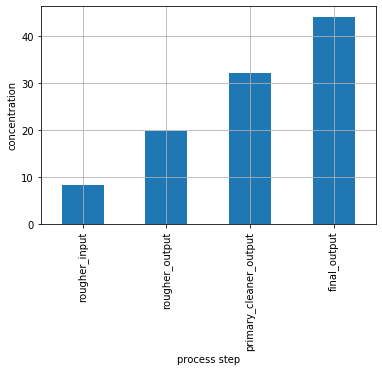


Концентрация Ag на разных этапах очистки

        rougher_input  rougher_output  primary_cleaner_output  final_output
mean         8.794927       11.994759                8.442408      5.168387
median       8.593574       12.098115                8.507298      5.066039


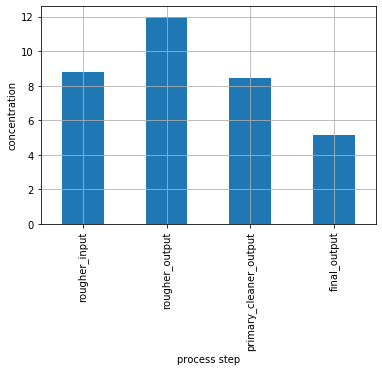


Концентрация Pb на разных этапах очистки

        rougher_input  rougher_output  primary_cleaner_output  final_output
mean         3.585096        7.606272                9.810317      9.978821
median       3.528235        7.742580               10.142270     10.102264


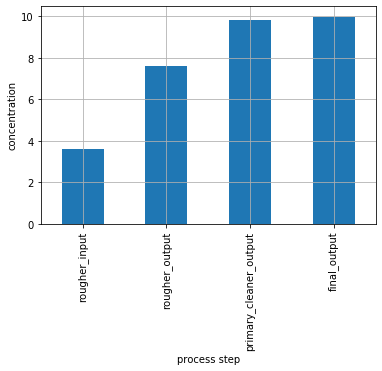

In [18]:
for elem in elem_for_analysis:
    print(f'Концентрация {elem} на разных этапах очистки')
    print()
    look_for_concentration(elem.lower())
    print()
#прохожусь данной функцией по списку исследуемых металлов

Концентрация золота увеличивается на каждом следующем этапе обработки, составляя 8% в исходном сырье и доходя до 44% в финальном концентрате. 

Концентрация серебра немного снижается в финальном концентрае по сравнению с исходным сырьем - с 8% до 5% После флотации   концентрация серебра незначительно увеличивается - до 12%.

Концентрация свинца в исходном сырье составляет 3.5%, а после флотации и первого этапа очистки увеличивается до 10%, сохраняя такую концентрацию вплоть до исходного сырья. 

### Сравнение размеров гранул на обучающей и тестовой выборке

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [19]:
df_full.columns[df_full.columns.str.contains('feed_size')] #нахожу столбцы с нужными данными

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')

В данных имеются признаки со сведениями о размерах гранул в финальном сырье и перед первым этапом очистки.

Произведем сравнение по сведениям об исходном сырье как первостепенным.

Выведем распределения значений размеров гранул в обучающей и тестовой выборках и построим гистограммы.

In [20]:
df_train_feed_size = pd.DataFrame(df_train['rougher.input.feed_size'].describe())
df_test_feed_size = pd.DataFrame(df_test['rougher.input.feed_size'].describe())
df_train_feed_size.columns = ['train']
df_test_feed_size.columns = ['test']
df_feed_size = df_train_feed_size.join(df_test_feed_size)
df_feed_size

,train,test
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


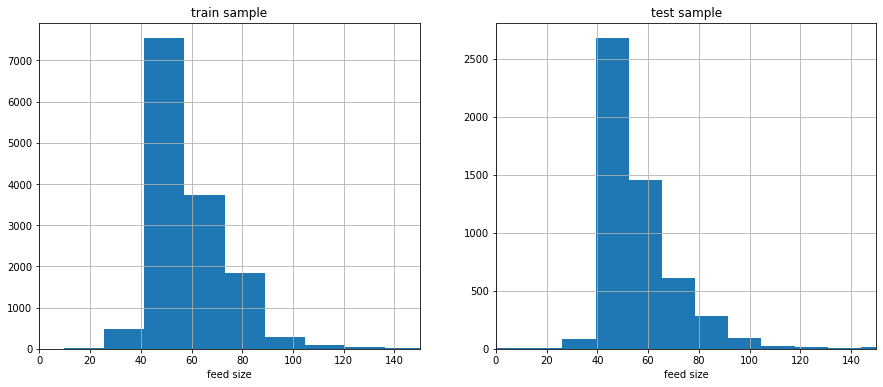

In [21]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df_train['rougher.input.feed_size'].hist(bins=30)
plt.xlim(0, 150)
plt.title('train sample')
plt.xlabel('feed size')

plt.subplot(1, 2, 2)
df_test['rougher.input.feed_size'].hist(bins=30)
plt.xlim(0, 150)
plt.title('test sample')
plt.xlabel('feed size')

plt.show()

Распределение выглядит идентично.

### Исследование суммарной концентрации веществ

Исследуем суммарную концентрацию всех веществ (золота, серебра и свинца) на разных стадиях.

In [22]:
df_full.columns[df_full.columns.str.contains('au|ag|pb')] #найдем признаки с нужной информацией

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_au', 'final.output.tail_ag',
       'final.output.tail_pb', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
       'rougher.output.tail_pb', 'rougher.output.tail_au',
       'secondary_cleaner.output.tail_ag', 'secondary_

Создадим новые признаки со значениями суммарной концентрации веществ на разных этапах.

In [23]:
df_full['rougher.input.sum'] = (df_full['rougher.input.feed_pb'] +
                                df_full['rougher.input.feed_ag'] +
                                df_full['rougher.input.feed_au'])

In [24]:
df_full['rougher.output.sum'] = (df_full['rougher.output.concentrate_ag'] + 
                                df_full['rougher.output.concentrate_pb'] + 
                                df_full['rougher.output.concentrate_au'])

In [25]:
df_full['primary_cleaner.output.sum'] = (df_full['primary_cleaner.output.concentrate_ag'] +
                                        df_full['primary_cleaner.output.concentrate_pb'] +
                                        df_full['primary_cleaner.output.concentrate_au'])

In [26]:
df_full['final.output.sum'] = (df_full['final.output.concentrate_ag'] + 
                              df_full['final.output.concentrate_pb'] + 
                              df_full['final.output.concentrate_au'])

Сохраним данные признаки в отдельный датафрейм.

In [27]:
df_chemicals_sum = df_full[['rougher.input.sum', 'rougher.output.sum', 'primary_cleaner.output.sum', 'final.output.sum']]

In [28]:
df_chemicals_sum.columns = [('_').join(name.split('.')[:2]) for name in df_chemicals_sum.columns] 
#более кратко именую принаки (убераю 'sum' из названия)

Выведем средние значения суммарной концентрации веществ на разных этапах и посмотрим на распределение.

In [29]:
df_chemicals_sum.mean()

rougher_input             20.646120
rougher_output            39.373032
primary_cleaner_output    50.372125
final_output              59.223721
dtype: float64

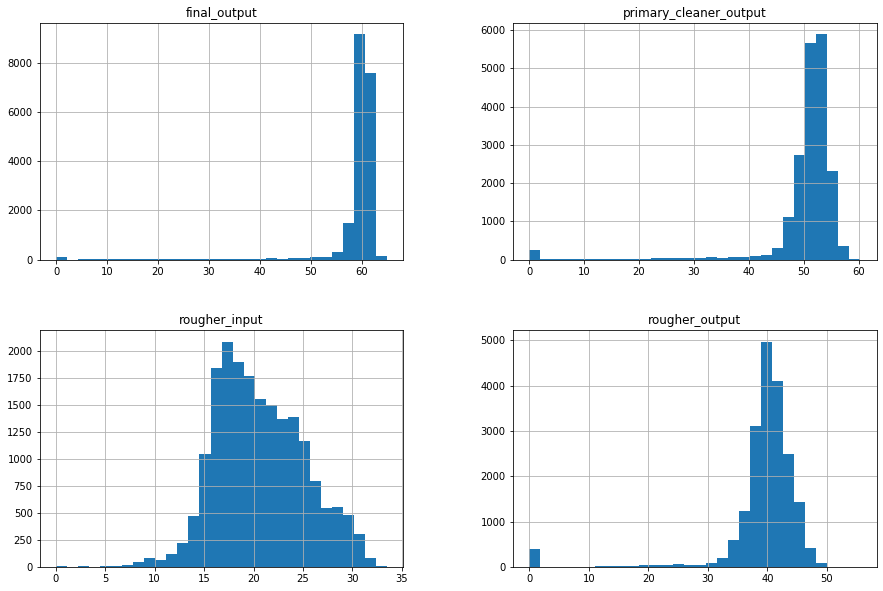

In [30]:
df_chemicals_sum.hist(bins=30, figsize=(15, 10))
plt.show()

Суммарная концентрация всех веществ увеличивается с каждым следующим этапом обработки.

Посмотрим на количество строк с нулевым суммарным значением веществ в первоначальном сырье.

In [31]:
print(f'Количество строк с нулевой суммарной концентрацией веществ на первоначальном сырье:', 
      len(df_chemicals_sum[df_chemicals_sum['rougher_input'] == 0]))

Количество строк с нулевой суммарной концентрацией веществ на первоначальном сырье: 0


Строки с нулевым суммарным значением веществ в первоначальном сырье отсутствуют. Это значит нулевые суммарные значения веществ на последующих этапах являются ошибочными, поскольку вещества не могут просто исчезнуть, а даже напротив - на каждом последующем этапе суммарная концентрация веществ должна увеличиваться.

Удалим строки с нулевыми суммарными значениями веществ на последуюих стадиях, посмотрим на процент удаленных строк и на получившееся распределение.

In [32]:
start_num_strings = len(df_chemicals_sum)
print(f'Количество строк в датасете до удаления нулевых значений:', start_num_strings)

Количество строк в датасете до удаления нулевых значений: 19439


In [33]:
print('Количество строк с нулевой суммарной концентрацией:')
for col in df_chemicals_sum:
    print(f'На этапе {col}: {len(df_chemicals_sum[df_chemicals_sum[col] == 0])}')

Количество строк с нулевой суммарной концентрацией:
На этапе rougher_input: 0
На этапе rougher_output: 394
На этапе primary_cleaner_output: 108
На этапе final_output: 98


In [34]:
for col in df_chemicals_sum:
    df_chemicals_sum = df_chemicals_sum[df_chemicals_sum[col] != 0]

In [35]:
print('Количество строк с нулевой суммарной концентрацией:')
for col in df_chemicals_sum:
    print(f'На этапе {col}: {len(df_chemicals_sum[df_chemicals_sum[col] == 0])}')

Количество строк с нулевой суммарной концентрацией:
На этапе rougher_input: 0
На этапе rougher_output: 0
На этапе primary_cleaner_output: 0
На этапе final_output: 0


In [36]:
end_num_strings = len(df_chemicals_sum)
print(f'Количество строк в датасете после удаления нулевых значений:', end_num_strings)

Количество строк в датасете после удаления нулевых значений: 18848


In [44]:
print('Удалено процентов данных:', round((start_num_strings - end_num_strings) / start_num_strings * 100))

Удалено процентов данных: 3


In [45]:
df_chemicals_sum.mean()

rougher_input             20.625440
rougher_output            40.188296
primary_cleaner_output    50.636350
final_output              59.522037
dtype: float64

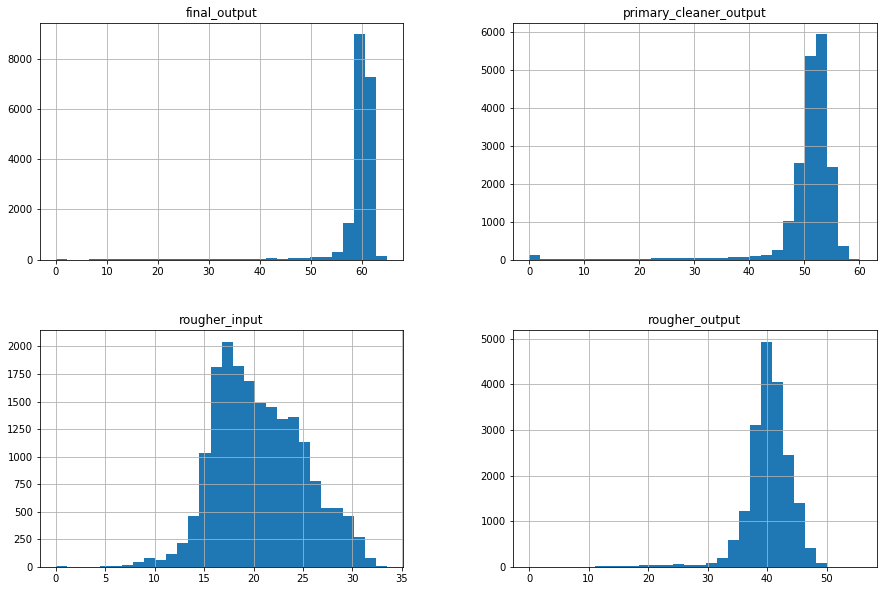

In [46]:
df_chemicals_sum.hist(bins=30, figsize=(15, 10))
plt.show()

Удаление выбросов улучшило качество данных.

## Модель

Выделим целевой признак в обучающей и тестовой выборке.

In [47]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

Обучающую выборку разделим на обучающую и валидацицонную в соотношении 3/1.

In [48]:
features_train_temp, features_valid_temp, target_train_temp, target_valid_temp = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

Напишем функцию для расчета итогового SMAPe.

In [49]:
def smape_result(target, predictions):
    
    def smape(targ, pred):
        smape = (abs(targ - pred) / ((abs(targ) + abs(pred)) / 2)).sum() * 100 / len(targ)
        return smape
    
    target_rougher = target.iloc[:, 0]
    target_final = target.iloc[:, 1]
    predictions_rouger = predictions[:, 0]
    predictions_final = predictions[:, 1]
    
    smape_rough = smape(target_rougher, predictions_rouger)
    smape_final = smape(target_final, predictions_final)
    
    smape_result = 0.25 * smape_rough + 0.75 * smape_final
    
    return smape_result   

Подеберем через цикл гиперпараметр глубины для моделей дерева решений и случайного леса, а также гиперпараметр количества деревьев для модели случайного леса.

In [50]:
best_smape = 100
for i in tqdm(range(1, 11)):
    model_decision_tree = DecisionTreeRegressor(random_state=12345, max_depth=i)
    model_decision_tree.fit(features_train_temp, target_train_temp)
    predictions_decision_tree = model_decision_tree.predict(features_valid_temp)
    smape = smape_result(target_valid_temp, predictions_decision_tree)
    if smape < best_smape:
        best_smape = smape
        best_max_depth = i
decision_tree = DecisionTreeRegressor(random_state=12345, max_depth=best_max_depth)
print('Модель Decision Tree')
print(f'Лучшее sMAPE = {best_smape} со значением max_depth: {best_max_depth}')


Модель Decision Tree
Лучшее sMAPE = 8.212824472523838 со значением max_depth: 8


In [51]:
best_smape = 100
for i in tqdm(range(1, 11)):
    model_random_forest = RandomForestRegressor(random_state=12345, n_estimators=i, max_depth=best_max_depth)
    model_random_forest.fit(features_train_temp, target_train_temp)
    predictions_random_forest = model_random_forest.predict(features_valid_temp)
    smape = smape_result(target_valid_temp, predictions_random_forest)
    if smape < best_smape:
        best_smape = smape
        best_n_estimators = i
random_forest = RandomForestRegressor(random_state=12345, n_estimators=best_n_estimators, max_depth=best_max_depth)
print('Модель Random Forest')
print(f'Лучшее sMAPE= {best_smape} со значением n_estimators: {best_n_estimators}')


Модель Random Forest
Лучшее sMAPE= 8.008396132653898 со значением n_estimators: 3


In [52]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(features_train_temp, target_train_temp)
predictions_linear_regression = model_linear_regression.predict(features_valid_temp)
linear_regression = LinearRegression()
print('sMAPE модели Linear Regression')
smape_result(target_valid_temp, predictions_linear_regression)

sMAPE модели Linear Regression


9.125553722762909

Проверим качество моделей метрикой SMAPe посредством кросс-валидации на 5 блоках.

In [63]:
NUMBER_OF_PIECES = 5 #количество блоков

chunks = np.array_split(df_train, NUMBER_OF_PIECES) #разделяю на блоки

results = {'decision_tree': [],
          'random_forest': [],
          'linear_regression': []}
#создаю словарь для сохранения результатов тестирования модели на каждом блоке

models = {'decision_tree': decision_tree,
         'random_forest': random_forest,
         'linear_regression': linear_regression}
#создаю словарь для доступа к моделям по названиям

for i in tqdm(range(NUMBER_OF_PIECES)):
    chunks_temp = chunks.copy()
    feat_test = chunks_temp[i].drop(['rougher.output.recovery', 'final.output.recovery'], axis=1) #сохраняю features
    targ_test = chunks_temp[i][['rougher.output.recovery', 'final.output.recovery']] #сохраняю целевой признак
    chunks_temp.pop(i)
    #удаляю тестовый блок
    train = pd.concat(chunks_temp) #создаю из оставшихся блоков обучающую выборку
    features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
    target_train = train[['rougher.output.recovery', 'final.output.recovery']]
    #выделяю целевой признак
    for model in models:
        models[model].fit(features_train, target_train)
        predictions = models[model].predict(feat_test)
        smape = smape_result(targ_test, predictions)
        results[model].append(smape)
    #обучаю в цикле каждую модель и сохраняю sMAPE в словарь с результатами
      

best_smape = 100
for result in results:
    print()
    print(f'Результат модели {result} по результатам кросс-валидации на {NUMBER_OF_PIECES} блоках:')
    print(f'Срендее sMAPE: {pd.Series(results[result]).mean()}')
    if pd.Series(results[result]).mean() < best_smape:
        best_smape = pd.Series(results[result]).mean()
        best_model = models[result]
        best_model_name = result
    print(f'Медианное sMAPE: {pd.Series(results[result]).median()}')
    print(f'Стандартное отклонение sMAPE: {pd.Series(results[result]).std()}')
print()
print(f'Лучшая модель: {best_model_name} со средним sMAPE = {best_smape}')
#нахожу модель с лучшим средним sMAPE



Результат модели decision_tree по результатам кросс-валидации на 5 блоках:
Срендее sMAPE: 14.233982802660176
Медианное sMAPE: 14.761426247780697
Стандартное отклонение sMAPE: 1.9220844167124287

Результат модели random_forest по результатам кросс-валидации на 5 блоках:
Срендее sMAPE: 11.743943422412832
Медианное sMAPE: 11.600486119905906
Стандартное отклонение sMAPE: 0.9420920568082772

Результат модели linear_regression по результатам кросс-валидации на 5 блоках:
Срендее sMAPE: 12.384596104847201
Медианное sMAPE: 12.74686745383589
Стандартное отклонение sMAPE: 1.695713555091622

Лучшая модель: random_forest со средним sMAPE = 11.743943422412832


Теперь проверим лучшую модель на тестовой выборке и выведем SMAPe.

In [55]:
best_model_predictions = best_model.predict(features_test)
print(f'sMAPE лучшей модели на тестовой выборке: {smape_result(target_test, best_model_predictions)}')

sMAPE лучшей модели на тестовой выборке: 9.956309132946805


Лучшие результаты по итогам кросс-валидации показала модель случайного леса. На тестовой выборке SMAPe данной модели 9.96.

In [59]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_predictions = dummy_regr.predict(features_test)

In [62]:
print('sMAPE модели, предсказывающей средние значения:', smape_result(target_test, dummy_predictions))

sMAPE модели, предсказывающей средние значения: 11.064510195497956


Обученная модель случайного леса предсказывает лучше, чем модель, предсказывающая средние значения.